In [1]:
URL = "https://data.seattle.gov/api/views/7mre-hcut/rows.csv?accessType=DOWNLOAD"

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x246b7d85a90>)

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2017-08-28 23:00:00,11.0,9.0
2013-05-23 04:00:00,0.0,2.0
2013-08-16 07:00:00,194.0,75.0
2017-04-01 04:00:00,0.0,1.0
2017-12-05 22:00:00,15.0,18.0


In [4]:
data.plot()

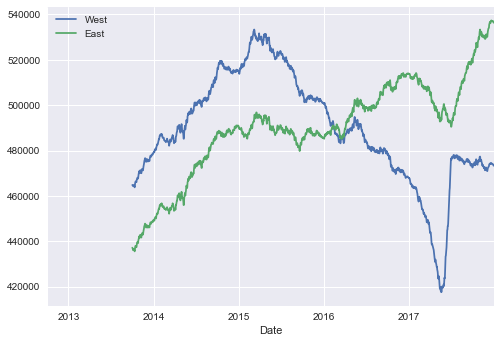

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
data.columns = ['West', 'East']
data.resample('D').sum().rolling(365).sum().plot()

In [6]:
data['Total'] = data['West'] + data['East']

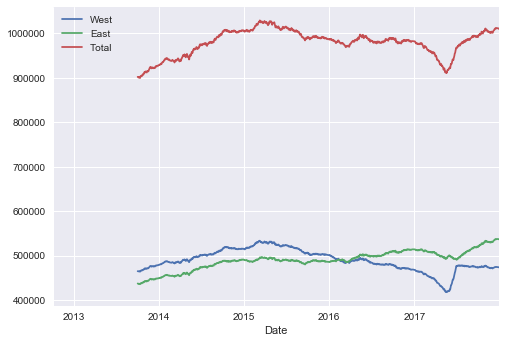

In [7]:
data.resample('D').sum().rolling(365).sum().plot()

In [8]:
data.head()

,West,East,Total
Date,,,
2017-08-28 23:00:00,11.0,9.0,20.0
2013-05-23 04:00:00,0.0,2.0,2.0
2013-08-16 07:00:00,194.0,75.0,269.0
2017-04-01 04:00:00,0.0,1.0,1.0
2017-12-05 22:00:00,15.0,18.0,33.0


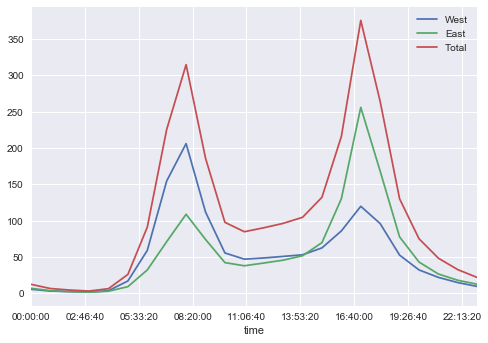

In [9]:
data.groupby(data.index.time).mean().plot()

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]      

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


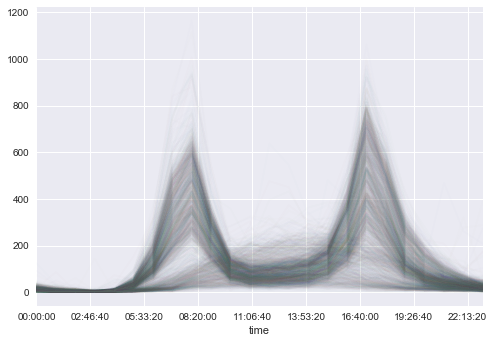

In [11]:
pivoted.plot(legend=False, alpha=0.01)